In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import spotipy
from spotipy.oauth2 
import SpotifyOAuth

# Data files
bb_path = "data/billboardHot100_1999-2019.csv"
songAtt_path = "data/songAttributes_1999-2019.csv"
gramAlb_path = "data/grammyAlbums_199-2019.csv"
roty_path = "data/ROTYdata (Edited).csv"
aoty_path = "data/AOTYdata(Edited).csv"
gramSong_path = "data/grammySongs_1999-2019.csv"


# Read the data
bb_data = pd.read_csv(bb_path)
songAtt_data = pd.read_csv(songAtt_path)
gramAlb_data = pd.read_csv(gramAlb_path)
roty_data = pd.read_csv(roty_path)
aoty_data = pd.read_csv(aoty_path)
gramSong_data = pd.read_csv(gramSong_path)

# Combine the data into a single DataFrame
# results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# bb_data.head()
# songAtt_data.head()
# gramAlb_data.head()
# Display the data table for preview

In [2]:
roty_data2 = roty_data.rename(columns ={"record": "Name"})

In [3]:
df_1 = pd.merge(roty_data2, gramSong_data, on = "Name", how = "left")
df_1.head(25)

,year,Name,artist,status,Record Label,Did Perform at Grammys,Unnamed: 0,X,GrammyAward,GrammyYear,Genre,Artist
0,2010,Need You Now,Lady Antebellum,Winner,Capital Nashville,True,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Empire State of Mind,Jay-Z,Nominee,Roc Nation,False,184.0,183.0,Best Rap Song,2010.0,Rap,"Burt Keyes & Sylvia Robinson, Songwriters"
2,2010,F*** You,CeeLo Green,Nominee,Warner Music Group,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,Love the Way You Lie,Eminem,Nominee,Aftermath Entertainment,True,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,Nothin' on You,B.o.B,Nominee,Atlantic Records,True,NaN,NaN,NaN,NaN,NaN,NaN
5,2011,Rolling in the Deep,Adele,Winner,Columbia Records,True,150.0,149.0,Record Of The Year,2011.0,General,Adele
6,2011,Rolling in the Deep,Adele,Winner,Columbia Records,True,151.0,150.0,Song Of The Year,2011.0,General,Adele
7,2011,The Cave,Mumford & Sons,Nominee,Island Records,False,NaN,NaN,NaN,NaN,NaN,NaN
8,2011,Firework,Katy Perry,Nominee,Capital Records,True,NaN,NaN,NaN,NaN,NaN,NaN
9,2011,Grenade,Bruno Mars,Nominee,Elektra Records,True,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_2 = df_1.drop(columns = ["year", "Unnamed: 0", "X", "Artist"])
df_2.head()

,Name,artist,status,Record Label,Did Perform at Grammys,GrammyAward,GrammyYear,Genre
0,Need You Now,Lady Antebellum,Winner,Capital Nashville,True,NaN,NaN,NaN
1,Empire State of Mind,Jay-Z,Nominee,Roc Nation,False,Best Rap Song,2010.0,Rap
2,F*** You,CeeLo Green,Nominee,Warner Music Group,False,NaN,NaN,NaN
3,Love the Way You Lie,Eminem,Nominee,Aftermath Entertainment,True,NaN,NaN,NaN
4,Nothin' on You,B.o.B,Nominee,Atlantic Records,True,NaN,NaN,NaN


In [5]:
df_2.value_counts("Genre")
# genre of all nominees ROTY

Genre
General                 10
Pop                      7
Rock                     3
American Roots Music     2
R&B                      2
Rap                      2
Composing/Arranging      1
Name: count, dtype: int64

In [6]:
df_3 = df_2.loc[df_2["status"] == "Winner"]
df_3.head(100)

,Name,artist,status,Record Label,Did Perform at Grammys,GrammyAward,GrammyYear,Genre
0,Need You Now,Lady Antebellum,Winner,Capital Nashville,True,NaN,NaN,NaN
5,Rolling in the Deep,Adele,Winner,Columbia Records,True,Record Of The Year,2011.0,General
6,Rolling in the Deep,Adele,Winner,Columbia Records,True,Song Of The Year,2011.0,General
11,Somebody That I Used to Know,Gotye,Winner,Eleven: A Music Company,False,NaN,NaN,NaN
18,Get Lucky,Daft Punk,Winner,Columbia Records,True,Record Of The Year,2013.0,General
19,Get Lucky,Daft Punk,Winner,Columbia Records,True,Best Pop Duo/Group Performance,2013.0,Pop
25,Stay with Me (Darkchild Version),Sam Smith,Winner,Capital Records,True,Record Of The Year,2014.0,General
26,Stay with Me (Darkchild Version),Sam Smith,Winner,Capital Records,True,Song Of The Year,2014.0,General
31,Uptown Funk,Mark Ronson,Winner,RCA Records,False,Record Of The Year,2015.0,General
32,Uptown Funk,Mark Ronson,Winner,RCA Records,False,Best Pop Duo/Group Performance,2015.0,Pop


In [7]:
# Song Attributes Visualization
roty_data3 = roty_data2.rename(columns ={"artist": "Artist"})
df_4 = pd.merge(roty_data3, songAtt_data, on = "Name", how = "left")
df_4.head(100)

,year,Name,Artist_x,status,Record Label,Did Perform at Grammys,Unnamed: 0,Acousticness,Album,Artist_y,...,Explicit,Instrumentalness,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,2010,Need You Now,Lady Antebellum,Winner,Capital Nashville,True,160.0,0.02100,The Way,Macy Gray,...,False,0.000000,0.1160,-4.124,1.0,30.0,0.0327,110.004,4.0,0.704
1,2010,Need You Now,Lady Antebellum,Winner,Capital Nashville,True,63.0,0.09270,Need You Now,Lady Antebellum,...,False,0.000636,0.2000,-5.535,1.0,35.0,0.0303,107.943,4.0,0.231
2,2010,Need You Now,Lady Antebellum,Winner,Capital Nashville,True,87.0,0.69100,Own The Night,Lady Antebellum,...,False,0.000000,0.0906,-8.745,1.0,26.0,0.0283,107.864,4.0,0.199
3,2010,Empire State of Mind,Jay-Z,Nominee,Roc Nation,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,F*** You,CeeLo Green,Nominee,Warner Music Group,False,137.0,0.01180,500 Degreez,Lil' Wayne,...,True,0.000000,0.2000,-4.790,0.0,28.0,0.2010,160.119,4.0,0.696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016,Hello,Adele,Winner,Columbia Records,True,36.0,0.20800,I AM...SASHA FIERCE NEW DELUXE EDITION,Beyonce,...,False,0.000003,0.1940,-5.682,1.0,18.0,0.1530,129.963,4.0,0.390
96,2016,Hello,Adele,Winner,Columbia Records,True,152.0,0.20600,I AM...SASHA FIERCE,Beyonce,...,False,0.000002,0.1430,-5.755,1.0,31.0,0.1700,97.515,3.0,0.416
97,2016,Hello,Adele,Winner,Columbia Records,True,9.0,0.07740,2014 Forest Hills Drive,J. Cole,...,True,0.000012,0.1060,-8.565,0.0,61.0,0.2120,159.973,4.0,0.329
98,2016,7 Years,Lukas Graham,Nominee,Copenhagen Records,True,135.0,0.01960,Whitey Ford Sings the Blues,Everlast,...,True,0.000002,0.1100,-8.107,1.0,27.0,0.0855,91.977,4.0,0.842


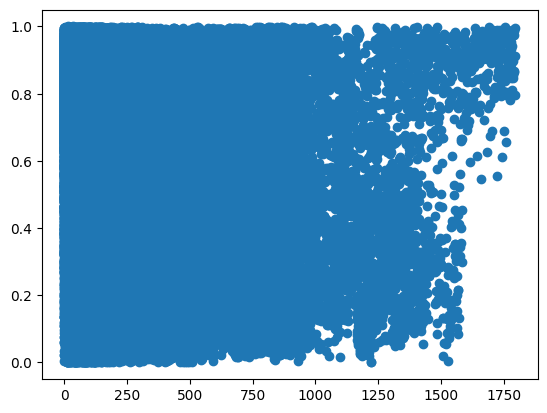

In [8]:
#songAtt_data.value_counts("Artist")
plt.scatter(songAtt_data["Unnamed: 0"], songAtt_data["Energy"])

In [9]:
# rename merge column
#bb_data = bb_data.rename(columns={'Artists': 'Artist'})
# bb_data.head()

In [10]:
# take out unneccesary years
#gramAlb_new = gramAlb_data[~gramAlb_data.GrammyYear.between(1999, 2008)]
#gramAlb_new.columns = gramAlb_new.columns.str.strip()
#gramAlb_new.head(500)

In [11]:
#gramAlb_new2 = gramAlb_new.set_index(["Genre"]).loc["Pop"].value_counts
#gramAlb_new2
# 

In [12]:
# filter
#gramAlb_new2 = gramAlb_new.set_index("Award")
# gramAlb_new2.loc["Album Of The Year"]

In [13]:
# grammy 
#gramAlb_new3 = gramAlb_new2.loc["Album Of The Year"].drop(columns = ["Unnamed: 0"])
#gramAlb_new3.head(10)

In [14]:
# gramAlb_new3 = gramAlb_new.query('2010 < GrammyYear < 2019')
# print (gramAlb_new3)

In [15]:
# Create a clean DataFrame.
#df_2 = pd.merge(roty_data, aoty_data, on = "artist", how = "left")
#df_2.head()

In [16]:
#df_2.dtypes

In [17]:
# Create a clean DataFrame.
#df_3 = df_2.drop(columns = ["Writing.Credits", "Lyrics", "Features", "TimeSignature", "Valence", "Name_y", "Speechiness", "Unnamed: 0_y", "Unnamed: 0_x"])
#df_3.head(15)

In [18]:
# df_3.dtypes

In [19]:
#df_3[df_3.duplicated(keep=False)]

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM.
# Put into summry DF.

In [21]:
# Bar and Pie Charts

In [22]:
# Generate a box plot

In [23]:
# Generate a line plot

In [24]:
# Generate a scatter plot